# <font  color = 'orange'> **Aplicando métodos no supervisados** </font>


##   <font  color = 'orange'>  1. Configuracion del ambiente  </font>

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier

drive.mount('/content/drive/')

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid", palette="twilight")


path = '/content/drive/MyDrive/data sets/bootcamp/challenge/'

Mounted at /content/drive/


## <font  color = 'orange'> 2. Obtencion de los datos  </font>
---

In [2]:
name = 'media prediction and its cost.csv'
data = pd.read_csv(path + name)
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

> Inicialmente no contamos con valores nulos.

### <font  color = 'orange'> Traduciendo los datos </font>
---

Creando una funcion que regresa un DataFrame con los datos traducidos.

In [4]:
import sys
sys.path.append(path)
import diccionarios

def traduccion_datos(data):

  data_copy = data.copy()
  # Renombrando columnas
  data_copy.rename(columns = diccionarios.columnas, inplace= True)
  # Traduccion de las variables categóricas
  columnas_nombres = data_copy.select_dtypes('object').columns
  for columna in columnas_nombres:
    if hasattr(diccionarios, columna):
      diccionario = getattr(diccionarios, columna)
      data_copy[columna] = data_copy[columna].map(diccionario)

  return data_copy

In [5]:
data_copy = traduccion_datos(data)
data_copy.sample(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,hijos_en_casa,promedio_autos(aprox)_1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,tipo_tienda,ciudad_tienda,estado_tienda,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
54486,Productos de plástico,Artículos para el hogar,No comestible,1.40,0.5600,2.0,Destructores de precios,Estados Unidos,Soltero,Masculino,4.0,Superior,Plata,Gestión,No,2.0,60000,0.0,2.0,Denny,0.70,14.0,12.0,0.0,0.0,3.0,Supermarket,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Televisión,135.92
28816,Eléctrico,Artículos para el hogar,No comestible,7.64,3.8200,4.0,Más barato,México,Casado,Femenino,2.0,Secundaria,Bronce,Técnico,Sí,2.0,60000,1.0,2.0,Sunset,1.91,18.7,16.7,1.0,0.0,30.0,Deluxe Supermarket,Hidalgo,Zacatecas,30584.0,21938.0,5188.0,3458.0,1.0,1.0,1.0,1.0,1.0,Radio,115.25
32218,Sopa enlatada,Alimentos enlatados,Comida,12.76,5.6144,4.0,Destructores de precios,Estados Unidos,Soltero,Femenino,0.0,Secundaria,Bronce,Técnico,No,2.0,40000,0.0,2.0,Blue Label,3.19,15.2,12.1,1.0,1.0,35.0,Supermarket,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Televisión,135.92


> Los datos se han traducido de manera correcta!

In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

>Después de haber realizado la correspondiente traducción notamos que ahora la columna *miembros* posee valores nulos.

Checando posible columna repetida

In [7]:
(data_copy['promedio_autos(aprox)_1'] == data_copy['promedio_autos(aprox)']).sum() == data_copy.shape[0]

True

In [8]:
data_copy.drop(columns=['promedio_autos(aprox)_1'], inplace=True)

Guardamos despues de haber traducido el conjunto de datos.

In [9]:
data_copy.to_csv(path+'datos_clientes.csv', index=False)

## <font  color = 'orange'> 3. Análisis exploratorio </font>
---


### Visualizando los datos

In [10]:
datos = pd.read_csv(path + 'datos_clientes.csv')

In [13]:
def plot_count(data, x:str, hue:str, fs_per=12):
  plt.figure(figsize=(16,6))
  grafico = sns.countplot(data=datos, x = x, hue=hue)
  grafico.set_title(f'Total de {hue.capitalize()} por {x.capitalize()}', fontsize = 14)
  grafico.set_xlabel(f'{x.capitalize()}', fontsize=12)
  grafico.set_ylabel('Total', fontsize = 12)

  sizes = []
  for p in grafico.patches:
    if p.get_height() > 0:
      height = p.get_height()
      sizes.append(height)
      grafico.text(p.get_x() + p.get_width()/1.85, height + 200,
                    f'{round(100*height/len(datos),2)}%',
                    ha = 'center', va= 'bottom', fontsize = fs_per)
  grafico.set_ylim(0,max(sizes)*1.2)
  grafico;


#### 1. Analizando por país

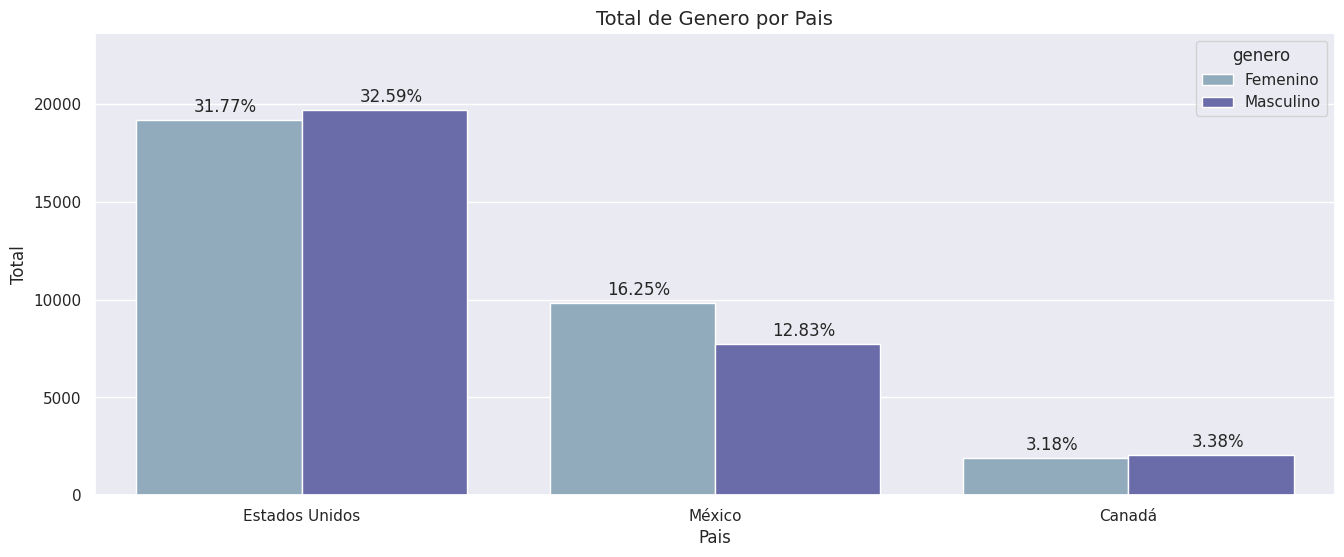

In [14]:
plot_count(datos, 'pais', 'genero')

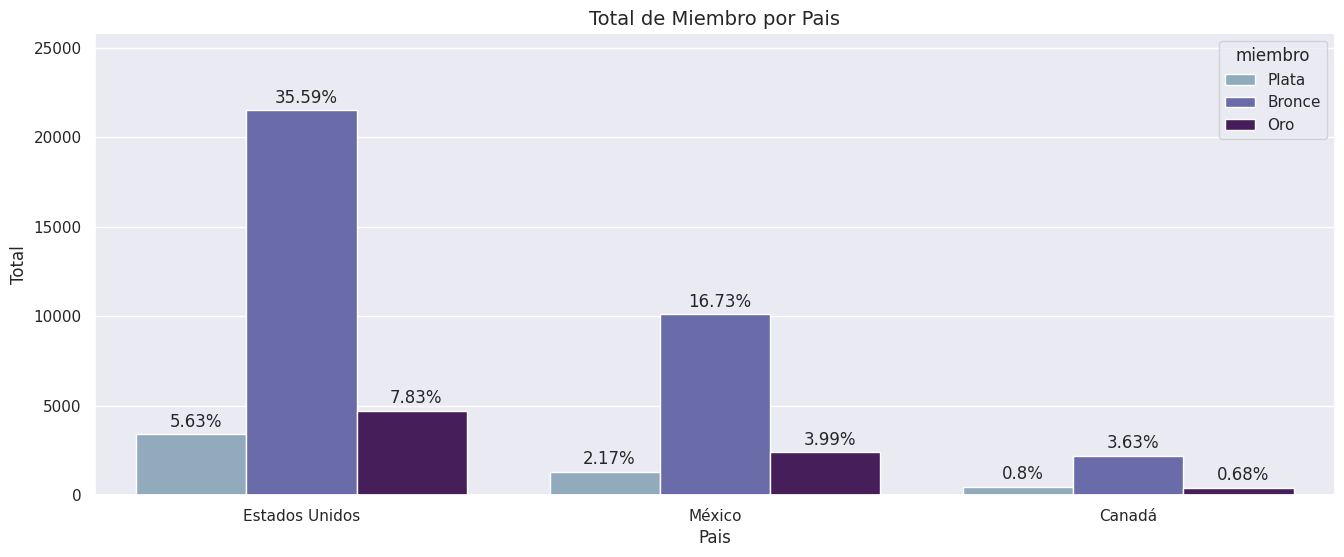

In [ ]:
plot_count(datos, 'pais', 'miembro')

> Del grafico observamos los siguiente:
> * EUA concentra cerca del $50\%$ del total de los datos, siendo el
  que mayor prdomina entre México y Canadá.
> * Los miembros bronce son quienes mayor predominan en los tres paises.



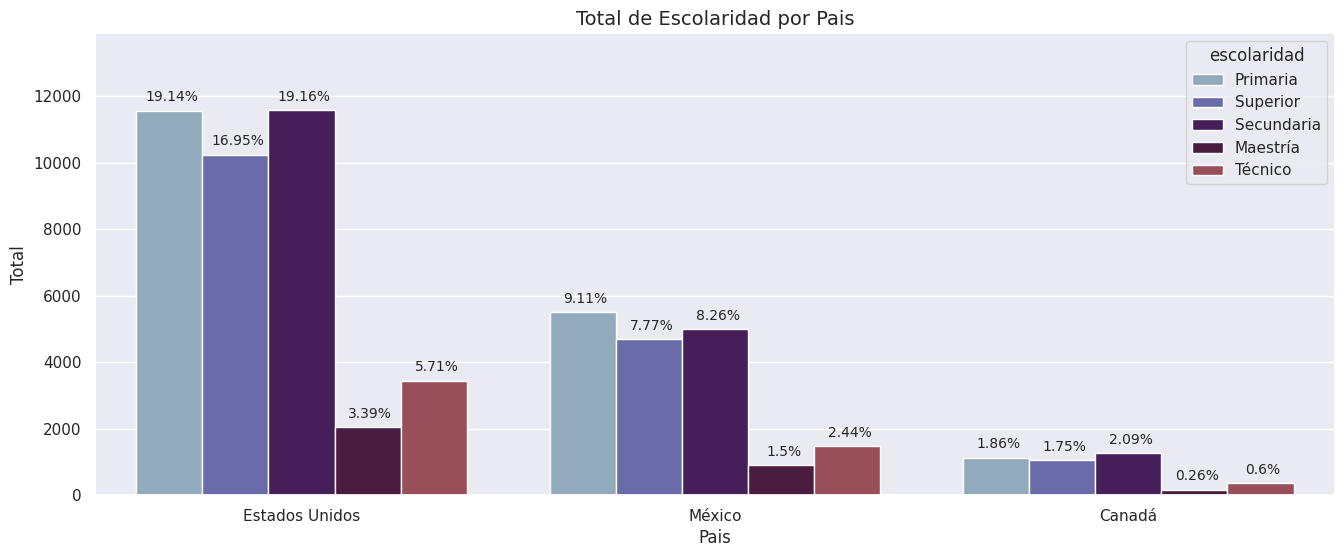

In [ ]:
plot_count(datos, 'pais', 'escolaridad', 10)

> Notamos que en los tres paises las escolaridades *Primaria, Superior* y *Secundaria* son las que predominan en los tres paises.  

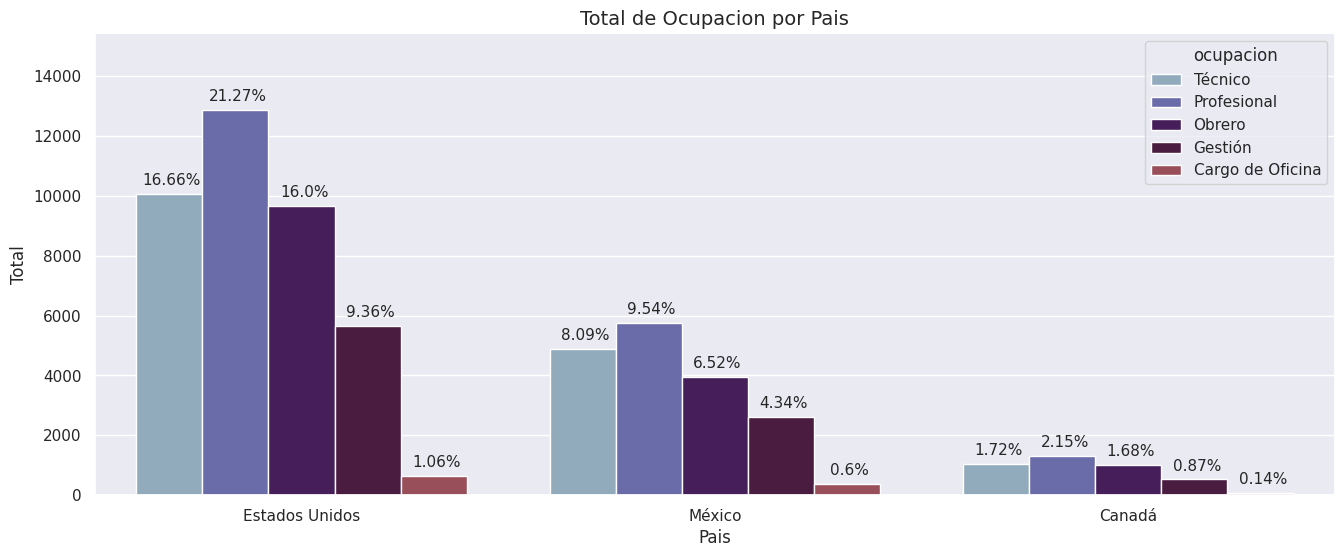

In [ ]:
plot_count(datos,'pais', 'ocupacion',11)

> Notamos que hay tres ocupaciones que predominan en los tres paises: *técnico, profesional* y *obrero*.

#### Analizando por miembro

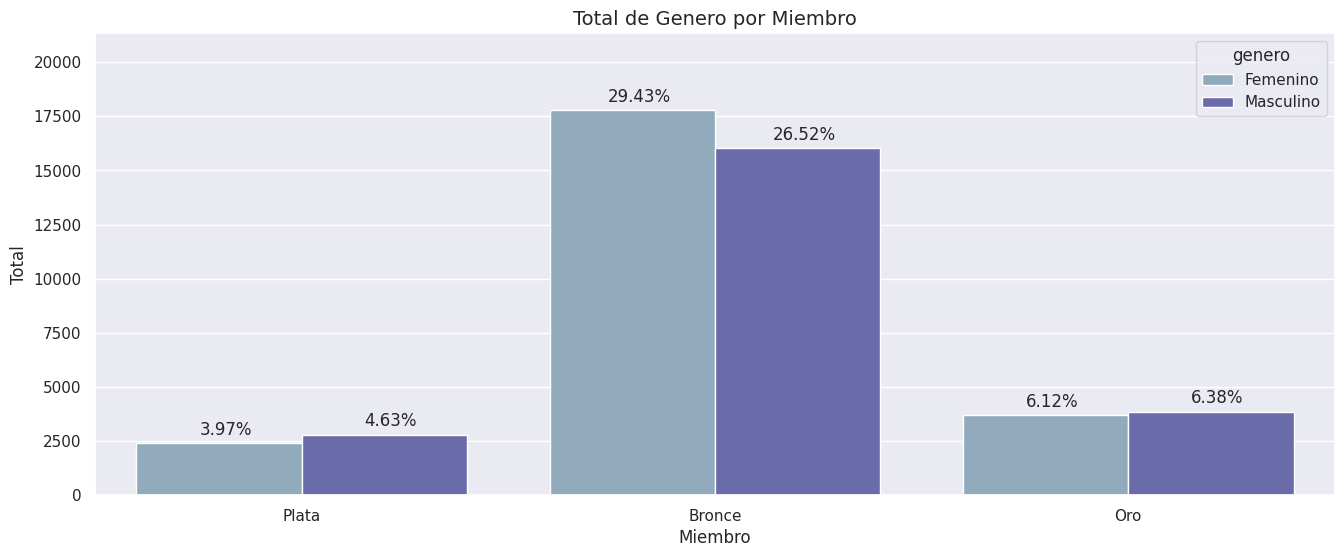

In [ ]:
plot_count(datos, 'miembro', 'genero')

> De aqui podemos notar que para los tres tipos de miembros hay un equilibrio entre el género

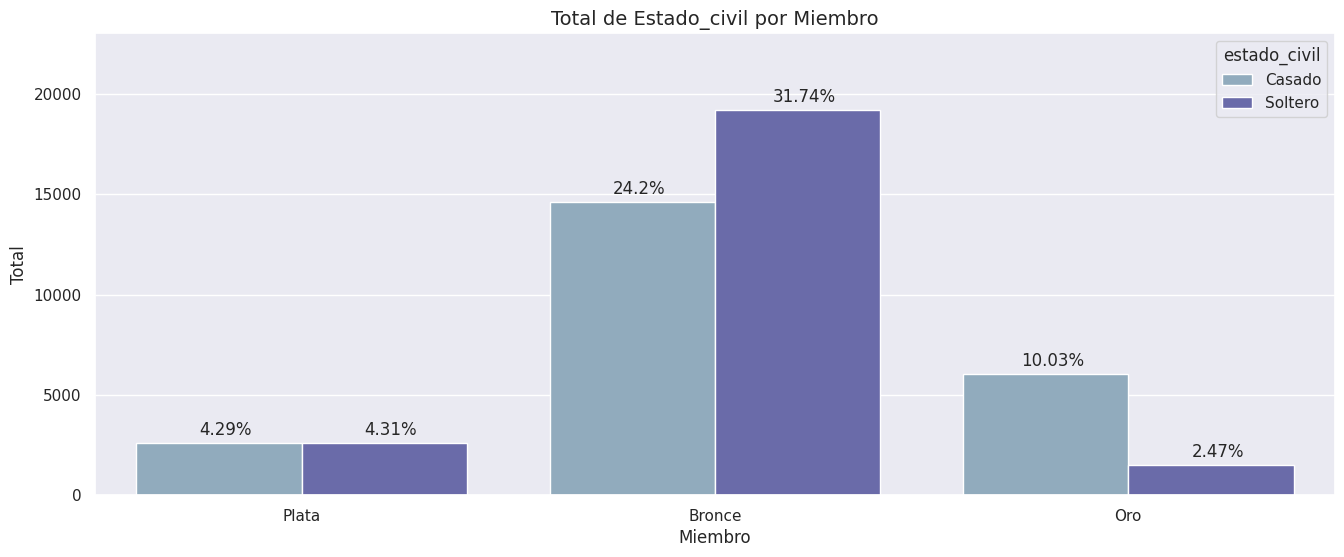

In [ ]:
plot_count(datos, 'miembro', 'estado_civil')

> Notamos lo siguiente:
  * Los solteros(as) son los que mayor predominan en los miembros *bronce*.
  * Los casados son mayoria en los miembros *Oro*.
  * Hay un equilibrio entre casados y solteros en los miembros *Plata*.

## Analizando por ingreso